In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

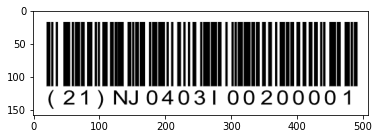

In [2]:
img = cv2.imread("img/example-serial-number.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,"gray")

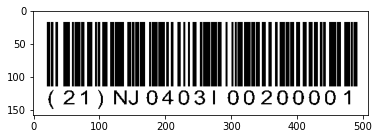

In [3]:
treshold = 128
img[img>treshold] = 255
img[img<=treshold] = 0
plt.imshow(img,"gray")

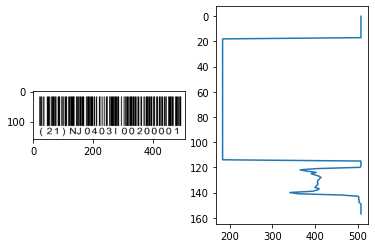

In [4]:
horizontal_hist = np.sum(img,axis=1,keepdims=True)/255

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(img,"gray")
ax2.plot(horizontal_hist,range(np.shape(horizontal_hist)[0]))
ax2.invert_yaxis()
plt.show()


In [5]:
print(max(horizontal_hist))

[508.]


In [6]:
line_segments = list()
start = False
i1, i2 = 0, 0
for i in range(np.shape(img)[0]):
    if horizontal_hist[i][0] < max(horizontal_hist):
            if start == False:
                i1, start = i , True
    else:
        if start:
            i2, start = i,  False
            line_segments.append([i1,i2])

print(line_segments)

#clean up
for line in line_segments:
    if line[1]-line[0]<10:
        line_segments.remove(line)

[[18, 115], [120, 149]]


In [7]:
cut_parts = list()
r, c = np.shape(line_segments)
for i in range(r):
    cut_parts.append(img[line_segments[i][0]:line_segments[i][1]:])

/home/petar/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


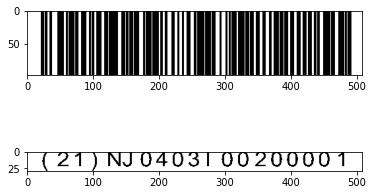

In [8]:
fig, axes = plt.subplots(nrows = np.shape(cut_parts)[0])

for i in range(np.shape(cut_parts)[0]):
    axes[i].imshow(cut_parts[i], "gray")


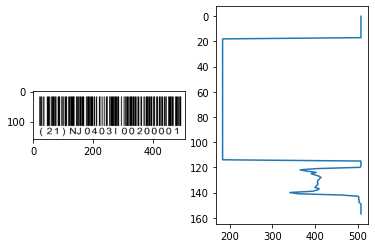

In [9]:
horizontal_hist = np.sum(img,axis=1,keepdims=True)/255

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(img,"gray")
ax2.plot(horizontal_hist,range(np.shape(horizontal_hist)[0]))
ax2.invert_yaxis()
plt.show()


In [10]:
line_segments = list()
start = False
i1, i2 = 0, 0
for i in range(np.shape(img)[0]):
    if horizontal_hist[i][0] < max(horizontal_hist):
            if start == False:
                i1, start = i , True
    else:
        if start:
            i2, start = i,  False
            line_segments.append([i1,i2])

print(line_segments)

#clean up
for line in line_segments:
    if line[1]-line[0]<10:
        line_segments.remove(line)

[[18, 115], [120, 149]]


In [11]:
# we can see that serial number is made from two part
#barcode and the numbers
#as we can see from the plot of the vertical hist the barcode gives a straight line meaning that all numbers there are euqal
#a easy way to find that is by finding the average value of that and comparing it to the max value
barcode = list()
for part in line_segments:
    if sum(horizontal_hist[part[0]:part[1]:])/(part[1]-part[0]) == max(horizontal_hist[part[0]:part[1]:]):
        barcode.append(part)

#removing it after the loop because of index errors
for part in barcode:
    line_segments.remove(part)
print(line_segments)


[[120, 149]]


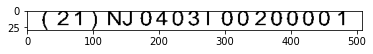

In [12]:
plt.imshow(img[line_segments[0][0]:line_segments[0][1]:],"gray")

In [13]:
serial_number = img[line_segments[0][0]:line_segments[0][1]:]

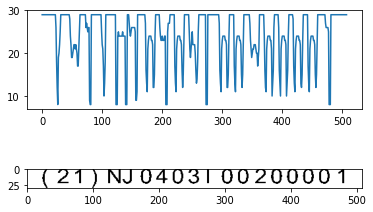

In [14]:
vertical_hist = np.sum(serial_number,axis=0,keepdims=True)/255
v= list()
for i in range(np.shape(vertical_hist)[1]):
    v.append(vertical_hist[0][i])
    
plt.subplot(211)
plt.plot(v)
plt.subplot(212)
plt.imshow(serial_number, "gray")

In [15]:
char_segments = list()
start = False
i1, i2 = 0, 0
m = max(v)
print(m)

for i in range(np.shape(serial_number)[1]):
    if vertical_hist[0][i] < m:
            if start == False:
                i1, start = i , True
    else:
        if start:
            i2, start = i,  False
            char_segments.append([i1,i2])

clean_chars = list()

for c in char_segments:
    if c[1]-c[0]<=10:
        clean_chars.append(c)

for c in clean_chars:
    char_segments.remove(c)
print(char_segments)

29.0
[[46, 63], [123, 142], [145, 159], [172, 189], [196, 213], [221, 237], [245, 261], [295, 312], [320, 336], [346, 362], [370, 387], [394, 411], [418, 435], [443, 459]]


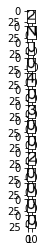

In [16]:
# plt.imshow(serial_number[::,46:63:],"gray")

numbers = list()

#using python slicing
for c in char_segments:
    numbers.append(serial_number[::,c[0]:c[1]:])

fig, axes = plt.subplots(nrows = len(numbers))
for i in range(len(numbers)):
    axes[i].imshow(numbers[i], "gray")